# Рубежный контроль №2

Братухин А.С. ИУ5-64Б Вариант №2

Для заданного набора данных (load_wine) строится модель регрессии. Для построения моделей используются методы линейной регрессии и градиентного бустинга. Оценивается качество моделей на основе подходящих метрик качества: коэф. детерминации, средние ошибки.  Перед построением моделей выполнена требуемая предобработка данных: заполнение пропусков, кодирование категориальных признаков. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = pd.read_csv('wine.data')

In [4]:
data.shape

(177, 14)

In [5]:
data.dtypes

1          int64
14.23    float64
1.71     float64
2.43     float64
15.6     float64
127        int64
2.8      float64
3.06     float64
.28      float64
2.29     float64
5.64     float64
1.04     float64
3.92     float64
1065       int64
dtype: object

In [6]:
data.isnull().sum()

1        0
14.23    0
1.71     0
2.43     0
15.6     0
127      0
2.8      0
3.06     0
.28      0
2.29     0
5.64     0
1.04     0
3.92     0
1065     0
dtype: int64

<Axes: >

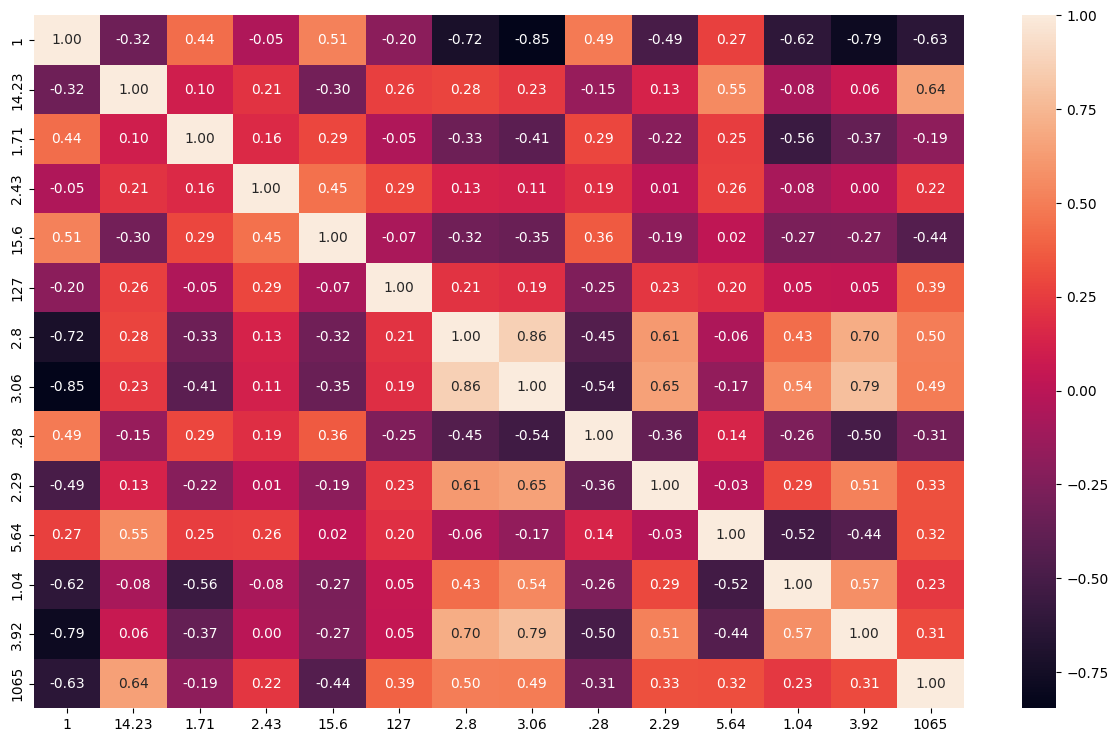

In [9]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method="pearson"), ax=ax, annot=True, fmt=".2f")

In [10]:
X = data[['2.8', '3.06', '15.6', '.28', '3.92']]
y = data['1']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [11]:
def print_metrics(y_test, y_pred):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

# Линейная регрессия

In [12]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)

# Градиентный бустинг

In [15]:
gb_model = GradientBoostingRegressor(random_state=11)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

In [16]:
print("Линейная регрессия")
print_metrics(y_test, y_pred_linear)

print("\nГрадиентный бустинг")
print_metrics(y_test, y_pred_gb)

Линейная регрессия
R^2: 0.8348604024308519
MSE: 0.098313560144047
MAE: 0.2542670644991219

Градиентный бустинг
R^2: 0.8190535166454003
MSE: 0.10772396951426104
MAE: 0.20902043425509034
